In [369]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [370]:
df1 = pd.read_excel("Final Quality Report.xlsx", sheet_name="Sheet1")
df2 = pd.read_excel("TS'24 Final Production Data.xlsx", sheet_name="Master")
df3 = pd.read_excel("TS'24 Final Detention Report.xlsx", sheet_name="Master")
final = pd.merge(df1, df2, on='Date', how='inner')
merged_df= pd.merge(final, df3, on= 'Date', how= 'inner')

c:\Users\USER\anaconda3\envs\tensorflow_env\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [371]:
df3

,Date,Shift,Detentions,Category,Sub-Category,Detentions Type,Remarks,Equipment,Start Time,Stop Time,Duration (mins),Duration (hrs),Shift Incharge,Column1,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,2024-04-01,A,MAGNET CLEANING,NaN,NaN,NaN,C #2 & C #4 MAGNET CLEANING(DRILL BIT FOUND),C#2,06:40:00,07:00:00,00:20:00,0.333333,Ranjan Kumar Mishra,NaN,NaN,NaN,NaN,NaN,Sub-Category,In Control
1,2024-04-01,A,CHUTE JAM,NaN,NaN,NaN,NaN,c#3,07:00:00,07:25:00,00:25:00,0.416667,Ranjan Kumar Mishra,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-04-01,A,LINER REMOVAL,NaN,NaN,NaN,NaN,c#2,12:25:00,12:35:00,00:10:00,0.166667,Ranjan Kumar Mishra,NaN,NaN,NaN,NaN,NaN,Row Labels,Sum of Duration (hrs)
3,2024-04-01,A,Root Removal,NaN,NaN,NaN,NaN,c#2,12:40:00,12:50:00,00:10:00,0.166667,Ranjan Kumar Mishra,NaN,NaN,NaN,NaN,NaN,OVERCURRENT,173.2
4,2024-04-01,A,ZSS,NaN,NaN,NaN,NaN,c#2,13:00:00,13:05:00,00:05:00,0.083333,Ranjan Kumar Mishra,NaN,NaN,NaN,NaN,NaN,c#4,67.433333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6730,2025-03-30,C,SCHEDULED MAINTENANCE,Maintenance,Scheduled Maintenance,Z5,NaN,ALL PLANT,00:00:00,05:51:00,05:51:00,5.850000,No SIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6731,2025-03-31,A,SCHEDULED MAINTENANCE,Maintenance,Scheduled Maintenance,Z5,NaN,ALL PLANT,05:50:00,13:50:00,08:00:00,8.000000,No SIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6732,2025-03-31,B,SCHEDULED MAINTENANCE,Maintenance,Scheduled Maintenance,Z5,NaN,ALL PLANT,13:50:00,21:50:00,08:00:00,8.000000,No SIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6733,2025-03-31,C,SCHEDULED MAINTENANCE,Maintenance,Scheduled Maintenance,Z5,NaN,ALL PLANT,21:50:00,23:59:00,02:09:00,2.150000,No SIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [372]:
merged_df= merged_df[merged_df['Sub-Category']=='In Control'].copy()

In [373]:
merged_df.shape

(4562, 103)

In [374]:
drop_cols = ['Sno','Wet Plant ROM Processing_Plan','Wet Plant Size Ore_Plan',
    'Wet Plant Fines Ore_Plan','Wet Plant Production_Plan','Slime Loss_Plan',
    'No. of Trips (100 TON)_OnDate','No. of Trips (100 TON)_Todate',
    'No. of Trips (50 TON )_OnDate','No. of Trips (50 TON )_Todate',
    'ROM Processed_Todate','Run Hours (C1 Hourmeter)_OnDate',
    'Run Hours (C1 Hourmeter)_Todate','PRIMARY AF HOL_Todate',
    'Rate of Dumping (Trips Per Hour)_OnDate','Rate of Dumping (Trips Per Hour)_Todate',
    'Primary TPH_Todate','TPD of Wet_Todate','ROM Processed_Todate.1',
    'Wash Plant Run Hour_OnDate','Wash Plant Run Hour_Todate',
    'Processing Rate Wash Plant_Todate','Sized Ore Produced_Todate',
    'Hydrocyclone Run Hour_Todate','Hydrocyclone Recovery_Todate ',
    'Hydrocyclone TPH_Todate','Hydrocyclone Recovery_Todate',
    'Classifier Fines Produced_Todate','Classifier FinesIncluding H/C recovery_Todate',
    'Lump Production in Wet (Sized ore)_OnDate','Lump Production in Wet (Sized ore)_Todate',
    'Lump Recovery % in Wet_Todate','Fines Recovery % in Wet_Todate',
    'Slime Loss (Wet Basis in Tonnage)_Todate','Slime Loss % (Wet Basis in Tonnage)_OnDate',
    'Slime Loss % (Wet Basis in Tonnage)_Todate','Total Production in Wet_OnDate',
    'Total Production in Wet_Todates','Wet Plant ROM Processing_Actual','LO', 'Slime_MT', 'Fe% (Slime)', 'SiO2%(Slime)','P%(Slime)','MT(Wet)','Slime Loss%','MT(Prod SO+FO)', 'Fe%(Prod)','Al2O3%(Prod)','K2O%(Prod)', 'Wet Plant ROM Processing_Actual','Wet Plant Size Ore', 'Wet Plant Fines Ore', 'Wet Plant Production',
       'Slime Loss', 'ROM Processed_OnDate', 'PRIMARY AF HOL_OnDate',
       'Primary TPH_OnDate', 'TPD of Wet_OnDate',
       'Processing Rate Wash Plant_OnDate', 'Sized Ore Produced_OnDate',
       'Hydrocyclone Run Hour_OnDate','Classifier Fines Produced_OnDate',
       'Classifier FinesIncluding H/C recovery_OnDate',
       'Fines Production in Wet (C10+C9)_OnDate',
       'Fines Production in Wet (C10+C9)_Todate','Slime Loss (Wet Basis in Tonnage)_OnDate','K2O%(Slime)', 'SiO2%(Prod)', 'P%(Prod)', 'Hydrocyclone Recovery_OnDate.1','Lump Recovery % in Wet_OnDate ','Shift Incharge',
       'Unnamed: 18', 'Unnamed: 19','Start Time',
       'Stop Time','Shift','Duration (mins)','Remarks','Detentions Type']

df = merged_df.drop(columns=drop_cols, errors='ignore')
df = df.dropna(axis=1, how='all')




In [375]:
df.columns

Index(['Date', 'HO', 'FO', 'Al2O3%(Slime)', 'Fe%(Wet)', 'SiO2%(Wet)',
       'Al2O3%(Wet)', 'P%(Wet)', 'K2O%(Wet)', 'ROM Processed_OnDate.1',
       'Hydrocyclone Recovery_OnDate', 'Hydrocyclone TPH_OnDate',
       'Fines Recovery % in Wet_OnDate', 'Detentions', 'Category',
       'Sub-Category', 'Equipment', 'Duration (hrs)'],
      dtype='object')

In [376]:
df.shape

(4562, 18)

In [377]:
top_equipment = df['Equipment'].value_counts().head(10)
print(top_equipment)
top_equipment = df['Equipment'].value_counts().sort_values(ascending=False).head(10)


Equipment
C#4              736
VS#1 (O)         619
SEC. CRUSHER     598
DIVERTER GATE    374
TER CRUSHER      324
VS#1 (C)         222
C#2              212
C#3              182
SS (O)           175
C#10             124
Name: count, dtype: int64


In [378]:
top_detention = df.groupby('Equipment')['Duration (hrs)'].sum().sort_values(ascending=False).head(10)
print(top_detention)

Equipment
SEC. CRUSHER     219.966667
C#4              122.933333
VS#1 (O)          86.433333
DIVERTER GATE     78.583333
C#3               60.683333
C#2               52.100000
SS (O)            45.983333
TER CRUSHER       43.000000
VS#1 (C)          31.200000
C#10              30.016667
Name: Duration (hrs), dtype: float64


In [379]:
equipment_freq_set = set(top_equipment.index)
detention_top_set = set(top_detention.index)
common_equipment = equipment_freq_set.intersection(detention_top_set)
print("Common equipment in both top 10 lists:")
print(common_equipment)

Common equipment in both top 10 lists:
{'C#3', 'TER CRUSHER', 'VS#1 (C) ', 'SEC. CRUSHER', 'DIVERTER GATE', 'SS (O)', 'C#4', 'VS#1 (O)', 'C#10', 'C#2'}


In [380]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date_day_month'] = df['Date'].dt.strftime('%d-%m-%Y') 


In [381]:
df.head()

,Date,HO,FO,Al2O3%(Slime),Fe%(Wet),SiO2%(Wet),Al2O3%(Wet),P%(Wet),K2O%(Wet),ROM Processed_OnDate.1,Hydrocyclone Recovery_OnDate,Hydrocyclone TPH_OnDate,Fines Recovery % in Wet_OnDate,Detentions,Category,Sub-Category,Equipment,Duration (hrs),Date_day_month
500,2024-05-01,0.0,0.000000,7.610000,63.379996,4.205296,2.262831,0.069514,0.017999,4804,138,21.835443,32.348043,Tertiary Feed Control,Operational Delay,In Control,TER CRUSHER,0.166667,01-05-2024
501,2024-05-01,0.0,0.000000,7.610000,63.379996,4.205296,2.262831,0.069514,0.017999,4804,138,21.835443,32.348043,Tertiary Feed Control,Operational Delay,In Control,TER CRUSHER,0.083333,01-05-2024
505,2024-05-02,0.0,75.862069,7.927422,62.680522,3.160770,3.275741,0.071414,0.031061,17040,870,40.979746,40.645540,SCREEN CHANGEOVER,Operational Delay,In Control,DWS (O),0.333333,02-05-2024
506,2024-05-02,0.0,75.862069,7.927422,62.680522,3.160770,3.275741,0.071414,0.031061,17040,870,40.979746,40.645540,Tertiary Feed Control,Operational Delay,In Control,TER CRUSHER,0.166667,02-05-2024
507,2024-05-02,0.0,75.862069,7.927422,62.680522,3.160770,3.275741,0.071414,0.031061,17040,870,40.979746,40.645540,Pull Cord,Operational Delay,In Control,C#4,0.166667,02-05-2024


In [382]:
df.shape

(4562, 19)

In [383]:
rom_grouped = df.groupby('Date_day_month').agg(
    ROM_processed_sum=('ROM Processed_OnDate.1', 'sum')
).reset_index()

In [384]:
rom_grouped.head()

,Date_day_month,ROM_processed_sum
0,01-01-2025,424011
1,01-02-2025,247616
2,01-03-2025,246840
3,01-05-2024,9608
4,01-06-2024,438183


In [385]:
import pandas as pd

df['Date'] = pd.to_datetime(df['Date'])

df['Date_month'] = df['Date'].dt.strftime('%d-%m-%Y')

common_equipment_list = ['C#3', 'TER CRUSHER', 'VS#1 (C) ', 'SEC. CRUSHER', 'DIVERTER GATE', 'SS (O)', 'C#4', 'VS#1 (O)', 'C#10', 'C#2']

final_df = pd.DataFrame()

for eq in common_equipment_list:
    eq_df = df[df['Equipment'] == eq] 
    grouped = eq_df.groupby('Date_month').agg(
        **{
            f'{eq}_detention_count': ('Equipment', 'count'),
            f'{eq}_detention_hrs': ('Duration (hrs)', 'sum')
        }
    ).reset_index()

    if final_df.empty:
        final_df = grouped
    else:
        final_df = pd.merge(final_df, grouped, on='Date_month', how='outer')

final_df['Date_month'] = pd.to_datetime(final_df['Date_month'], format='%d-%m-%Y')
final_df = final_df.sort_values(by='Date_month').reset_index(drop=True)

print(final_df)



    Date_month  C#3_detention_count  C#3_detention_hrs  \
0   2024-05-01                  NaN                NaN   
1   2024-05-02                  NaN                NaN   
2   2024-05-03                  NaN                NaN   
3   2024-05-04                  NaN                NaN   
4   2024-05-05                  1.0           0.166667   
..         ...                  ...                ...   
304 2025-03-22                  NaN                NaN   
305 2025-03-23                  3.0           0.333333   
306 2025-03-24                  NaN                NaN   
307 2025-03-25                  NaN                NaN   
308 2025-03-26                  NaN                NaN   

     TER CRUSHER_detention_count  TER CRUSHER_detention_hrs  \
0                            2.0                   0.250000   
1                            1.0                   0.166667   
2                            2.0                   0.166667   
3                            3.0                   

In [386]:
final_df.head(40)

,Date_month,C#3_detention_count,C#3_detention_hrs,TER CRUSHER_detention_count,TER CRUSHER_detention_hrs,VS#1 (C) _detention_count,VS#1 (C) _detention_hrs,SEC. CRUSHER_detention_count,SEC. CRUSHER_detention_hrs,DIVERTER GATE_detention_count,...,SS (O)_detention_count,SS (O)_detention_hrs,C#4_detention_count,C#4_detention_hrs,VS#1 (O)_detention_count,VS#1 (O)_detention_hrs,C#10_detention_count,C#10_detention_hrs,C#2_detention_count,C#2_detention_hrs
0,2024-05-01,NaN,NaN,2.0,0.250000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-05-02,NaN,NaN,1.0,0.166667,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,1.0,0.166667,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-05-03,NaN,NaN,2.0,0.166667,NaN,NaN,1.0,0.083333,NaN,...,1.0,0.083333,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.333333
3,2024-05-04,NaN,NaN,3.0,0.333333,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.166667,3.0,0.750000
4,2024-05-05,1.0,0.166667,2.0,0.166667,NaN,NaN,NaN,NaN,NaN,...,2.0,0.250000,NaN,NaN,1.0,0.583333,NaN,NaN,NaN,NaN
5,2024-05-06,NaN,NaN,2.0,0.183333,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,1.0,0.166667,NaN,NaN,NaN,NaN,3.0,0.583333
6,2024-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,2.0,0.333333,NaN,NaN,NaN,NaN,NaN,NaN
7,2024-05-08,NaN,NaN,6.0,0.583333,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2024-05-09,NaN,NaN,1.0,0.083333,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2024-05-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.416667,NaN,NaN


In [387]:
final_df

,Date_month,C#3_detention_count,C#3_detention_hrs,TER CRUSHER_detention_count,TER CRUSHER_detention_hrs,VS#1 (C) _detention_count,VS#1 (C) _detention_hrs,SEC. CRUSHER_detention_count,SEC. CRUSHER_detention_hrs,DIVERTER GATE_detention_count,...,SS (O)_detention_count,SS (O)_detention_hrs,C#4_detention_count,C#4_detention_hrs,VS#1 (O)_detention_count,VS#1 (O)_detention_hrs,C#10_detention_count,C#10_detention_hrs,C#2_detention_count,C#2_detention_hrs
0,2024-05-01,NaN,NaN,2.0,0.250000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-05-02,NaN,NaN,1.0,0.166667,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,1.0,0.166667,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-05-03,NaN,NaN,2.0,0.166667,NaN,NaN,1.0,0.083333,NaN,...,1.0,0.083333,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.333333
3,2024-05-04,NaN,NaN,3.0,0.333333,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.166667,3.0,0.750000
4,2024-05-05,1.0,0.166667,2.0,0.166667,NaN,NaN,NaN,NaN,NaN,...,2.0,0.250000,NaN,NaN,1.0,0.583333,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,2025-03-22,NaN,NaN,2.0,0.250000,1.0,0.083333,6.0,6.616667,1.0,...,NaN,NaN,1.0,0.083333,1.0,0.166667,NaN,NaN,1.0,0.083333
305,2025-03-23,3.0,0.333333,3.0,0.333333,NaN,NaN,6.0,0.750000,NaN,...,NaN,NaN,2.0,0.333333,NaN,NaN,NaN,NaN,NaN,NaN
306,2025-03-24,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.233333,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307,2025-03-25,NaN,NaN,2.0,0.250000,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,2.0,0.416667,NaN,NaN,NaN,NaN,NaN,NaN


In [388]:
rom_grouped['Date_month'] = pd.to_datetime(rom_grouped['Date_day_month'], format='%d-%m-%Y')
rom_grouped.drop(columns='Date_day_month', inplace=True)


final_df['Date_month'] = pd.to_datetime(final_df['Date_month'], format='%d-%m-%Y')


final_df = pd.merge(final_df, rom_grouped, on='Date_month', how='left')


In [389]:
final_df.head(5)

,Date_month,C#3_detention_count,C#3_detention_hrs,TER CRUSHER_detention_count,TER CRUSHER_detention_hrs,VS#1 (C) _detention_count,VS#1 (C) _detention_hrs,SEC. CRUSHER_detention_count,SEC. CRUSHER_detention_hrs,DIVERTER GATE_detention_count,...,SS (O)_detention_hrs,C#4_detention_count,C#4_detention_hrs,VS#1 (O)_detention_count,VS#1 (O)_detention_hrs,C#10_detention_count,C#10_detention_hrs,C#2_detention_count,C#2_detention_hrs,ROM_processed_sum
0,2024-05-01,NaN,NaN,2.0,0.250000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9608
1,2024-05-02,NaN,NaN,1.0,0.166667,NaN,NaN,NaN,NaN,1.0,...,NaN,1.0,0.166667,NaN,NaN,NaN,NaN,NaN,NaN,68160
2,2024-05-03,NaN,NaN,2.0,0.166667,NaN,NaN,1.0,0.083333,NaN,...,0.083333,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.333333,135440
3,2024-05-04,NaN,NaN,3.0,0.333333,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,1.0,0.166667,3.0,0.750000,193171
4,2024-05-05,1.0,0.166667,2.0,0.166667,NaN,NaN,NaN,NaN,NaN,...,0.250000,NaN,NaN,1.0,0.583333,NaN,NaN,NaN,NaN,106617


In [390]:
final_df.columns

Index(['Date_month', 'C#3_detention_count', 'C#3_detention_hrs',
       'TER CRUSHER_detention_count', 'TER CRUSHER_detention_hrs',
       'VS#1 (C) _detention_count', 'VS#1 (C) _detention_hrs',
       'SEC. CRUSHER_detention_count', 'SEC. CRUSHER_detention_hrs',
       'DIVERTER GATE_detention_count', 'DIVERTER GATE_detention_hrs',
       'SS (O)_detention_count', 'SS (O)_detention_hrs', 'C#4_detention_count',
       'C#4_detention_hrs', 'VS#1 (O)_detention_count',
       'VS#1 (O)_detention_hrs', 'C#10_detention_count', 'C#10_detention_hrs',
       'C#2_detention_count', 'C#2_detention_hrs', 'ROM_processed_sum'],
      dtype='object')

In [391]:
correlations = final_df.drop(columns=['Date_month']).corr()
rom_correlations = correlations['ROM_processed_sum'].sort_values(ascending=False)

#important_corr = rom_correlations[rom_correlations.abs() >= 0.4]

print("✅ Correlation with ROM Processed ≥ 0.4:\n")
print(rom_correlations)



✅ Correlation with ROM Processed ≥ 0.4:

ROM_processed_sum                1.000000
C#4_detention_count              0.349991
VS#1 (O)_detention_count         0.347883
SEC. CRUSHER_detention_count     0.327560
VS#1 (C) _detention_count        0.235224
DIVERTER GATE_detention_count    0.174362
TER CRUSHER_detention_hrs        0.161343
TER CRUSHER_detention_count      0.155435
DIVERTER GATE_detention_hrs      0.144775
VS#1 (C) _detention_hrs          0.144146
C#4_detention_hrs                0.133015
VS#1 (O)_detention_hrs           0.131165
C#2_detention_count              0.129210
C#3_detention_count              0.120259
C#2_detention_hrs                0.101265
C#10_detention_count             0.087027
SS (O)_detention_count           0.041819
C#10_detention_hrs              -0.071845
C#3_detention_hrs               -0.110724
SS (O)_detention_hrs            -0.172989
SEC. CRUSHER_detention_hrs      -0.215350
Name: ROM_processed_sum, dtype: float64


In [392]:
import pandas as pd


df['Date'] = pd.to_datetime(df['Date'])
df['Date_month'] = df['Date'].dt.strftime('%d-%m-%Y')


numeric_df = df.select_dtypes(include='number').copy()
numeric_df['Date_month'] = df['Date_month']
other_cols_grouped = numeric_df.groupby('Date_month').mean().reset_index()


final_df['Date_month'] = pd.to_datetime(final_df['Date_month']).dt.strftime('%d-%m-%Y')


equipment_df = final_df[['Date_month', 'C#4_detention_count', 'VS#1 (O)_detention_count', 'SEC. CRUSHER_detention_count']].copy()


rom_df = df[['Date', 'ROM Processed_OnDate.1']].copy()
rom_df['Date_month'] = rom_df['Date'].dt.strftime('%d-%m-%Y')
rom_grouped = rom_df.groupby('Date_month')['ROM Processed_OnDate.1'].sum().reset_index()
rom_grouped.rename(columns={'ROM Processed_OnDate.1': 'ROM_processed_sum'}, inplace=True)


compiled_df = other_cols_grouped.merge(equipment_df, on='Date_month', how='inner') \
                                .merge(rom_grouped, on='Date_month', how='inner')




In [393]:
compiled_df.head()

,Date_month,HO,FO,Al2O3%(Slime),Fe%(Wet),SiO2%(Wet),Al2O3%(Wet),P%(Wet),K2O%(Wet),ROM Processed_OnDate.1,Hydrocyclone Recovery_OnDate,Hydrocyclone TPH_OnDate,Fines Recovery % in Wet_OnDate,Duration (hrs),C#4_detention_count,VS#1 (O)_detention_count,SEC. CRUSHER_detention_count,ROM_processed_sum
0,01-01-2025,19.459459,57.297297,6.952886,63.689356,2.380147,2.753678,0.100566,0.022214,20191.0,638.0,28.609865,48.734585,0.149206,NaN,10.0,1.0,424011
1,01-02-2025,34.161491,55.900621,6.774149,62.283061,3.233310,3.525843,0.081001,0.022117,15476.0,812.0,49.633252,41.063582,0.144792,NaN,1.0,1.0,247616
2,01-03-2025,21.087309,45.328073,6.403818,63.862531,1.336586,3.238787,0.120434,0.013097,22440.0,1208.0,58.527132,51.876114,0.269697,1.0,2.0,1.0,246840
3,01-05-2024,0.000000,0.000000,7.610000,63.379996,4.205296,2.262831,0.069514,0.017999,4804.0,138.0,21.835443,32.348043,0.125000,NaN,NaN,NaN,9608
4,01-06-2024,23.118280,33.333333,8.490460,62.113339,2.382133,3.991652,0.082791,0.015894,16229.0,1131.0,58.753247,51.629799,0.145679,2.0,NaN,NaN,438183


In [394]:
compiled_df.shape

(309, 18)

In [395]:
compiled_df.drop(columns= 'ROM_processed_sum',inplace=True)

In [396]:
compiled_df.shape

(309, 17)

In [397]:
compiled_df.columns

Index(['Date_month', 'HO', 'FO', 'Al2O3%(Slime)', 'Fe%(Wet)', 'SiO2%(Wet)',
       'Al2O3%(Wet)', 'P%(Wet)', 'K2O%(Wet)', 'ROM Processed_OnDate.1',
       'Hydrocyclone Recovery_OnDate', 'Hydrocyclone TPH_OnDate',
       'Fines Recovery % in Wet_OnDate', 'Duration (hrs)',
       'C#4_detention_count', 'VS#1 (O)_detention_count',
       'SEC. CRUSHER_detention_count'],
      dtype='object')

In [398]:
#q1 = compiled_df['ROM Processed_OnDate.1'].quantile(0.25)
#q3 = compiled_df['ROM Processed_OnDate.1'].quantile(0.75)
#iqr_df = compiled_df[(compiled_df['ROM Processed_OnDate.1'] >= q1) & (compiled_df['ROM Processed_OnDate.1'] <= q3)].dropna()

In [399]:
df.shape

(4562, 20)

In [400]:
compiled_df = compiled_df.fillna(compiled_df.mean(numeric_only=True))  # or use .dropna(...)

y = compiled_df[['ROM Processed_OnDate.1']]
X = compiled_df.drop(columns=['ROM Processed_OnDate.1'])

In [401]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [402]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = X_train.select_dtypes(include='number')
X_test = X_test.select_dtypes(include='number')

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

In [403]:
models = {
    "DecisionTree": DecisionTreeRegressor(max_depth=10, min_samples_split=10),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "LinearRegression": LinearRegression()
}

print("Model Performance (R² Score):\n")
for name, model in models.items():
    if name in ["LinearRegression"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    print(f"{name:15s}: R² = {r2:.4f}")




Model Performance (R² Score):

DecisionTree   : R² = 0.6487


c:\Users\USER\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForest   : R² = 0.7753
LinearRegression: R² = 0.7431


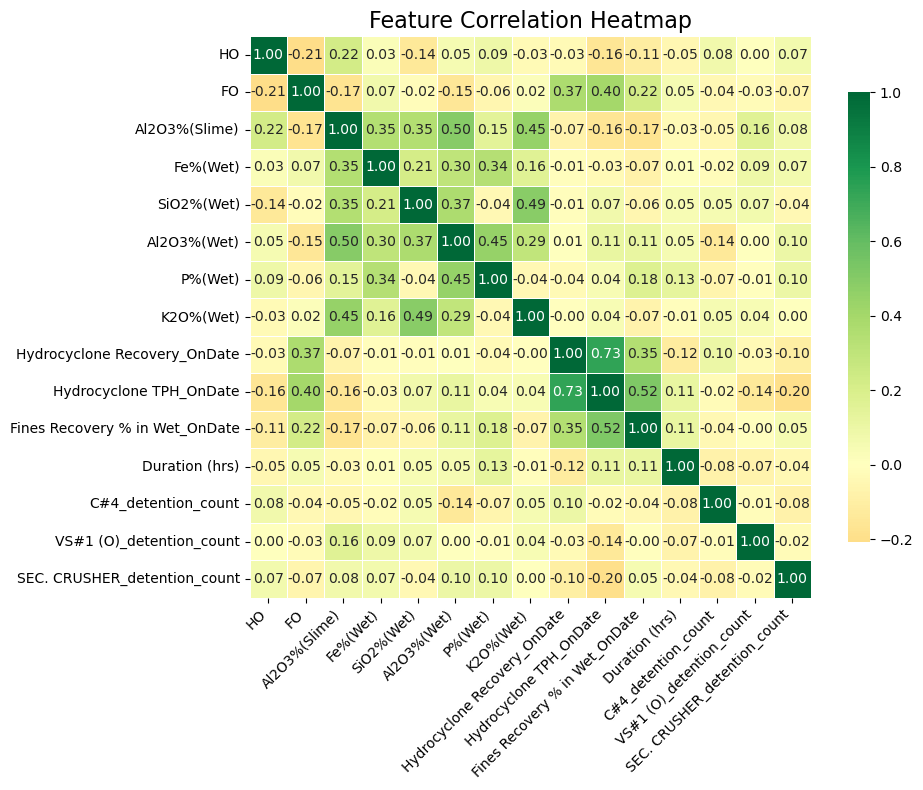

In [404]:

X_numeric = X.select_dtypes(include='number')

corr = X_numeric.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='RdYlGn', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [411]:
import statsmodels.api as sm
import pandas as pd


y = compiled_df['ROM Processed_OnDate.1']


X = compiled_df.drop(columns=['ROM Processed_OnDate.1', 'Date_month'], errors='ignore')

X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

mask = X.notna().all(axis=1) & y.notna()
X_clean = X[mask]
y_clean = y[mask]


X_with_const = sm.add_constant(X_clean)


model = sm.OLS(y_clean, X_with_const).fit()


print("📌 P-values of features w.r.t. ROM Processed:\n")
print(model.pvalues.sort_values())




📌 P-values of features w.r.t. ROM Processed:

Hydrocyclone Recovery_OnDate      4.920411e-51
HO                                7.372966e-07
Hydrocyclone TPH_OnDate           1.978098e-06
Duration (hrs)                    3.151160e-04
const                             8.396646e-04
FO                                4.886299e-02
SiO2%(Wet)                        6.518734e-02
VS#1 (O)_detention_count          1.420039e-01
Fe%(Wet)                          2.567663e-01
P%(Wet)                           3.158594e-01
Al2O3%(Slime)                     4.548624e-01
K2O%(Wet)                         8.266906e-01
C#4_detention_count               8.606847e-01
Fines Recovery % in Wet_OnDate    8.917472e-01
Al2O3%(Wet)                       9.404644e-01
SEC. CRUSHER_detention_count      9.607866e-01
dtype: float64


In [407]:
print(X_with_const.dtypes)
print(y.dtypes)


const                             float64
Date_month                         object
HO                                float64
FO                                float64
Al2O3%(Slime)                     float64
Fe%(Wet)                          float64
SiO2%(Wet)                        float64
Al2O3%(Wet)                       float64
P%(Wet)                           float64
K2O%(Wet)                         float64
Hydrocyclone Recovery_OnDate      float64
Hydrocyclone TPH_OnDate           float64
Fines Recovery % in Wet_OnDate    float64
Duration (hrs)                    float64
C#4_detention_count               float64
VS#1 (O)_detention_count          float64
SEC. CRUSHER_detention_count      float64
dtype: object
ROM Processed_OnDate.1    float64
dtype: object


In [413]:
df_clean = pd.concat([X, y], axis=1).dropna()
X = df_clean.drop(columns=['ROM Processed_OnDate.1'])
y = df_clean['ROM Processed_OnDate.1']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model1 = LinearRegression()
model1.fit(X_scaled, y)


coefficients = pd.Series(model1.coef_, index=X.columns)
intercept = model1.intercept_

print("📌 Linear Regression Analysis:")
print(f"Intercept: {intercept:.4f}\n")
print("Coefficients:")
print(coefficients.sort_values(ascending=False))


📌 Linear Regression Analysis:
Intercept: 17804.0680

Coefficients:
Hydrocyclone Recovery_OnDate      4034.825829
HO                                 736.835818
FO                                 309.033453
VS#1 (O)_detention_count           205.534409
Fe%(Wet)                           176.567209
Al2O3%(Slime)                      140.389776
Al2O3%(Wet)                         14.341955
SEC. CRUSHER_detention_count        -6.971005
Fines Recovery % in Wet_OnDate     -22.664452
C#4_detention_count                -24.639335
K2O%(Wet)                          -36.389828
P%(Wet)                           -166.913756
SiO2%(Wet)                        -312.414912
Duration (hrs)                    -518.725605
Hydrocyclone TPH_OnDate          -1210.396605
dtype: float64


In [ ]:
def print_regression_equation(intercept, coefficients):
    equation = f"ROM_Processed_OnDate.1 = {intercept:.4f}"
    for feature, coef in coefficients.items():
        sign = " + " if coef >= 0 else " - "
        equation += f"{sign}{abs(coef):.4f}*{feature}"
    print("Regression Equation:")
    print(equation)

print_regression_equation(intercept, coefficients)



📌 Regression Equation:

ROM_Processed_OnDate.1 = 17804.0680 + 736.8358*HO + 309.0335*FO + 140.3898*Al2O3%(Slime) + 176.5672*Fe%(Wet) - 312.4149*SiO2%(Wet) + 14.3420*Al2O3%(Wet) - 166.9138*P%(Wet) - 36.3898*K2O%(Wet) + 4034.8258*Hydrocyclone Recovery_OnDate - 1210.3966*Hydrocyclone TPH_OnDate - 22.6645*Fines Recovery % in Wet_OnDate - 518.7256*Duration (hrs) - 24.6393*C#4_detention_count + 205.5344*VS#1 (O)_detention_count - 6.9710*SEC. CRUSHER_detention_count
